<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/logo.jpg" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        Abuzer Yakaryilmaz | April 03, 2019 (updated) 
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> <font color="blue"> Solution for </font>One Bit</h2>

<a id="task3"></a>
<h3> Task 3 </h3>

Design a quantum circuit with 10 quantum bits and 10 classical bits.

For each quantum bit, flip a coin, and apply x-gate if the outcome is head.

Measure your quantum bits.

Execeute your circuit 128 times.

Repeat this task as mush as you want, and enjoy your random choices.

<h3>Solution</h3>

In [1]:
# we import all necessary methods and objects
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

# we will use 10 quantum bits and 10 classical bits
qreg3 =  QuantumRegister(10)
creg3 = ClassicalRegister(10)

mycircuit3 = QuantumCircuit(qreg3,creg3)

# we will store the index of each qubit to which x-gate is applied
picked_qubits=[] 

for i in range(10):
    if randrange(2) == 0: # Assume that 0 is Head and 1 is Tail
        mycircuit3.x(qreg3[i]) # apply x-gate
        print("x-gate is applied to the qubit with index",i)
        picked_qubits.append(i) # i is picked

# measurement 
mycircuit3.measure(qreg3,creg3)    

print("Everything looks fine, let's continue ...")

x-gate is applied to the qubit with index 3
x-gate is applied to the qubit with index 4
x-gate is applied to the qubit with index 8
x-gate is applied to the qubit with index 9
Everything looks fine, let's continue ...


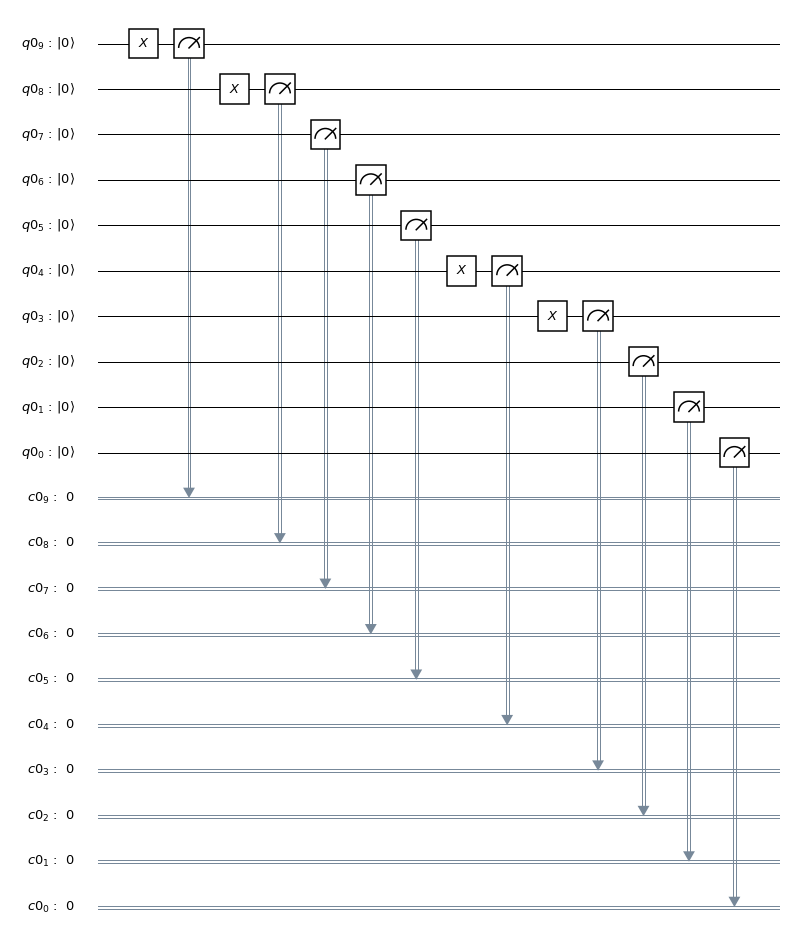

In [3]:
# draw the circuit
mycircuit3.draw(output='mpl',reverse_bits=True)
# reexecute me if you DO NOT see the circuit diagram

In [4]:
# execute the circuit and read the results
job = execute(mycircuit3,Aer.get_backend('qasm_simulator'),shots=128)

counts = job.result().get_counts(mycircuit3)

def print_outcomes(counts): # takes a dictionary variable
    for outcome in counts: # for each key-value in dictionary
        reverse_outcome = ''
        for i in outcome: # each string can be considered as a list of characters
            reverse_outcome = i + reverse_outcome # each new symbol comes before the old symbol(s)
        print(reverse_outcome,"is observed",counts[outcome],"times")
        
print_outcomes(counts)

0001100011 is observed 128 times
